In [16]:
import os

base_dir = 'PlantDiseasesDataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directory with training cat pictures
train_healthy_dir = os.path.join(train_dir, 'healthy')

#Directory with training dog pictures
train_unhealthy_dir = os.path.join(train_dir, 'unhealthy')

#Directory with validation cat pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy')

#Directory with validation dog pictures
validation_unhealthy_dir = os.path.join(validation_dir, 'unhealthy')

In [17]:
train_healthy_fnames = os.listdir(train_healthy_dir)
train_unhealthy_fnames = os.listdir(train_unhealthy_dir)

print(train_healthy_fnames[:10])
print(train_unhealthy_fnames[:10])

['Apple (1).JPG', 'Apple (10).JPG', 'Apple (11).JPG', 'Apple (12).JPG', 'Apple (13).JPG', 'Apple (14).JPG', 'Apple (15).JPG', 'Apple (16).JPG', 'Apple (17).JPG', 'Apple (18).JPG']
['Apple-blackrot (1).JPG', 'Apple-blackrot (10).JPG', 'Apple-blackrot (11).JPG', 'Apple-blackrot (12).JPG', 'Apple-blackrot (13).JPG', 'Apple-blackrot (14).JPG', 'Apple-blackrot (15).JPG', 'Apple-blackrot (16).JPG', 'Apple-blackrot (17).JPG', 'Apple-blackrot (18).JPG']


A look on the dataset by viewing images of the dataset

In [18]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

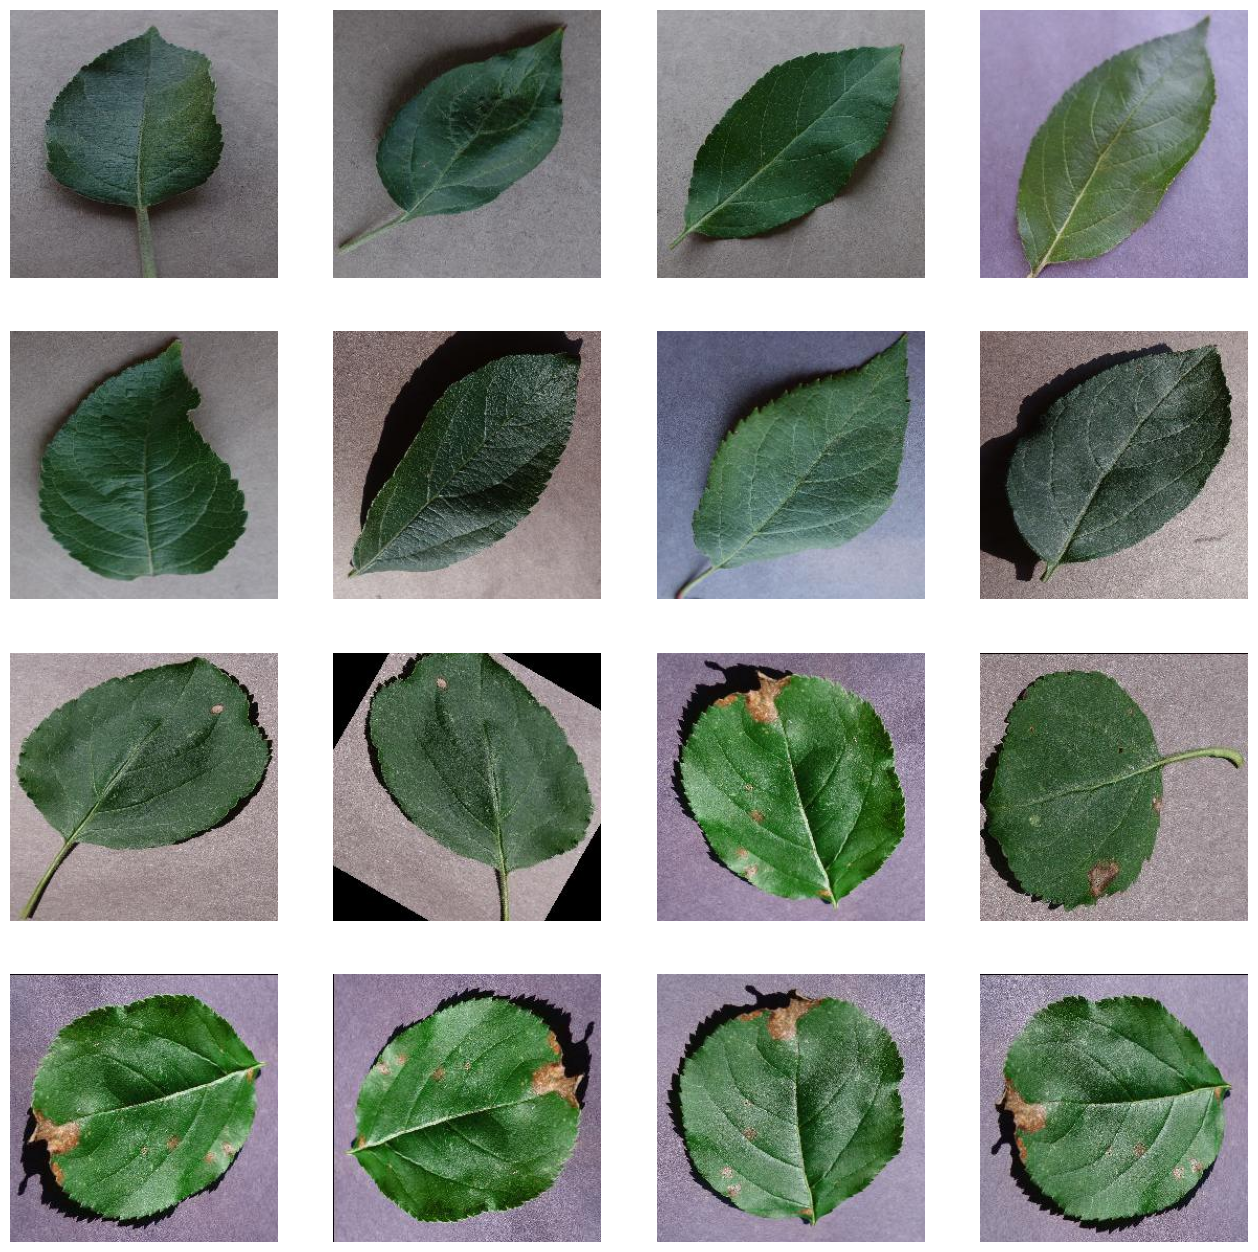

In [20]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_healthy_pix = [os.path.join(train_healthy_dir, fname)
                   for fname in train_healthy_fnames[pic_index-8:pic_index]
                   ]

next_unhealthy_pix = [os.path.join(train_unhealthy_dir, fname)
                   for fname in train_unhealthy_fnames[pic_index-8:pic_index]
                   ]

for i, img_path in enumerate(next_healthy_pix+next_unhealthy_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [25]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop


'''Creates a CNN with 4 convolutional layers'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('healthy') and 1 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
  

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [27]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

# Data preprocessing
Next step is to set up the data generators that will read pictures in the source folder, convert them to float32 tensors, and feed them (with their labels) to the model. These generators will yield batches of images of size 200X200 and their labels (categorical)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1900 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


# Training

In [29]:
# Constant for epochs
EPOCHS = 20

# Create a new model


# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=50,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=25,  # 1000 images = batch_size * steps
      verbose=2)


Epoch 1/20
50/50 - 26s - loss: 0.6452 - accuracy: 0.6775 - val_loss: 0.6347 - val_accuracy: 0.6825 - 26s/epoch - 523ms/step
Epoch 2/20
50/50 - 22s - loss: 0.6321 - accuracy: 0.6797 - val_loss: 0.6183 - val_accuracy: 0.6750 - 22s/epoch - 441ms/step
Epoch 3/20
50/50 - 22s - loss: 0.6135 - accuracy: 0.6769 - val_loss: 0.5926 - val_accuracy: 0.6762 - 22s/epoch - 442ms/step
Epoch 4/20
50/50 - 23s - loss: 0.5894 - accuracy: 0.6925 - val_loss: 0.5623 - val_accuracy: 0.7075 - 23s/epoch - 454ms/step
Epoch 5/20
50/50 - 22s - loss: 0.5601 - accuracy: 0.7114 - val_loss: 0.5400 - val_accuracy: 0.7212 - 22s/epoch - 449ms/step
Epoch 6/20
50/50 - 23s - loss: 0.5474 - accuracy: 0.7114 - val_loss: 0.5131 - val_accuracy: 0.7237 - 23s/epoch - 452ms/step
Epoch 7/20
50/50 - 23s - loss: 0.5427 - accuracy: 0.7158 - val_loss: 0.5572 - val_accuracy: 0.6988 - 23s/epoch - 451ms/step
Epoch 8/20
50/50 - 23s - loss: 0.5316 - accuracy: 0.7095 - val_loss: 0.5714 - val_accuracy: 0.7000 - 23s/epoch - 454ms/step
Epoch 9/

In [30]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

plt.show()

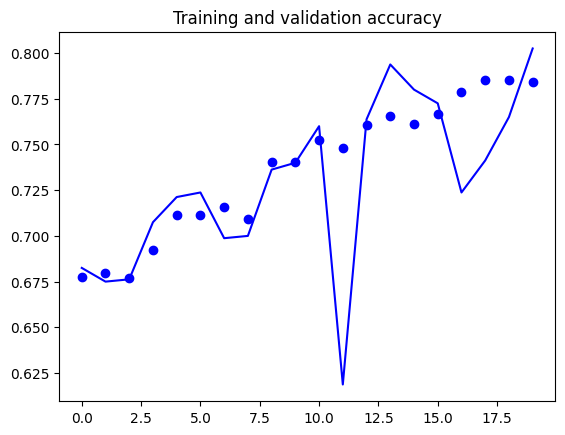

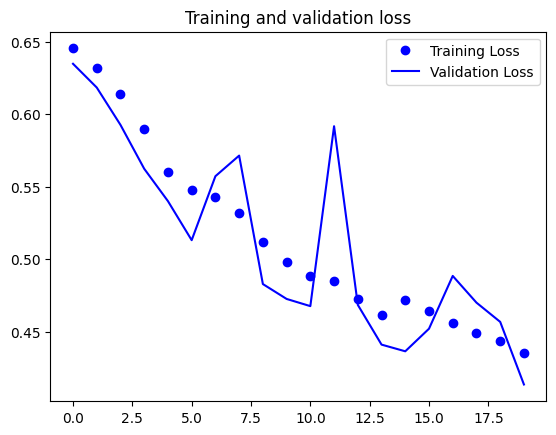

In [31]:
plot_loss_acc(history)

1/1 [==============================] - 0s 300ms/step
This image is 0.00% healthy and 100.00% unhealthy.


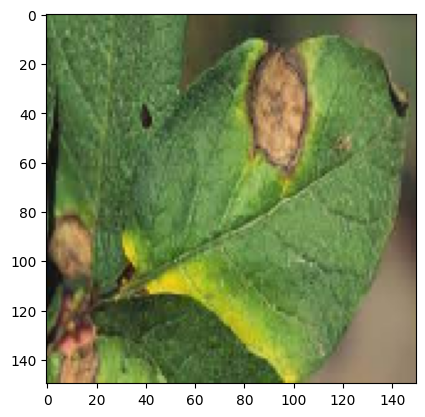

In [32]:
from tensorflow import keras
img = keras.utils.load_img(
    "C:\\Users\\Shashwat\\Downloads\\download (1).jpg", target_size=(150,150)
)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% healthy and {100 * score:.2f}% unhealthy.")

In [38]:
model.save('disease_model.keras')